# MACHINE LEARNING

# 5/4/25

[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]
3


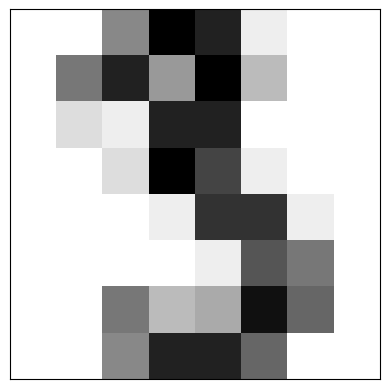

In [26]:
from sklearn.datasets import load_digits
dig = load_digits()
# print(dig)
# print(len(dig)) # 7

# for i in dig:
#     print(i)

# print(dig.DESCR)

# print(dig.target[::100])

# print(dig.data.shape)

print(dig.images[3])
print(dig.target[3])

# print(dig.data[3])

import matplotlib .pyplot as plt
# figure, axes = plt.subplots(nrows=4, ncols=6, figsize = (6,4))
# # plt.show()
# for item in zip(axes.ravel(), dig.images, dig.target):
#     axes, image, target = item
#     # axes.imshow(image, cmap = plt.cm.gray_r)
#     axes.imshow(image)
#     axes.set_xticks([])
#     axes.set_yticks([])
#     axes.set_title(target)
# plt.tight_layout()
# plt.show()

axes = plt.subplot()
image = plt.imshow(dig.images[3], cmap = plt.cm.gray_r)
xticks = axes.set_xticks([])
yticks = axes.set_yticks([])
plt.show()

_______
# Train and Test

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dig.data, dig.target, random_state = 11)
# X_train, X_test, y_train, y_test = train_test_split(dig.data, dig.target, random_state = 11, test_size = 0.2) # 80% of 1737 = 1437

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X = X_train, y = y_train)
predicted = knn.predict(X = X_test)
expected = y_test

# print(predicted)
# print()
# print(expected)

# wrong = [(p,e) for (p,e) in zip(predicted, expected) if p!=e]
# print(wrong)
# print(len(wrong))

# print(f'{knn.score(X_test, y_test):.2%}')

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true = expected, y_pred = predicted)
print(confusion)


[[45  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  1  0  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  1  2  0  0  0  0 39  1]
 [ 0  0  0  0  1  0  0  0  1 41]]


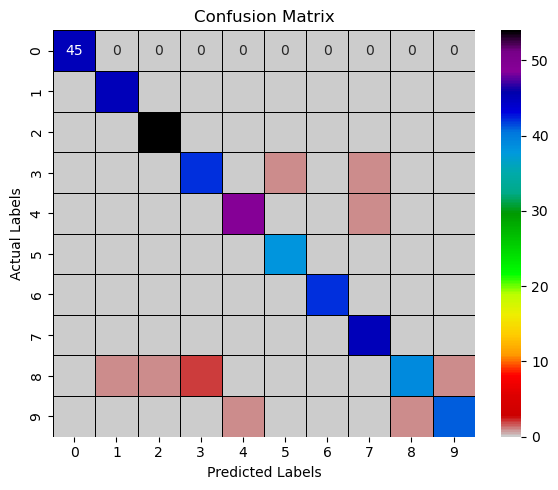

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [28]:
from sklearn.datasets import load_digits
dig = load_digits()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dig.data, dig.target, random_state = 11)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X = X_train, y = y_train)
predicted = knn.predict(X = X_test)
expected = y_test

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true = expected, y_pred = predicted)
plt.figure(figsize = (6,5))

sns.heatmap(confusion, annot = True, fmt = 'd', cmap = 'nipy_spectral_r', linewidth = 0.5, linecolor = 'black')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.tight_layout() 
plt.show()

from sklearn.metrics import classification_report
names = [str(digit) for digit in dig.target_names]
print(classification_report(expected, predicted, target_names = names))

____
# 8/4/25

## K-Fold Cross Validation
- Gets a little bit more accuracy.

In [29]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn, X=dig.data, y=dig.target, cv=kfold)
print(scores)

print(f'\nMean Accuracy: {scores.mean():.2%}')
print(f'Accuracy Standard Deviation: {scores.std():.2%}')

[0.97777778 0.99444444 0.98888889 0.97777778 0.98888889 0.99444444
 0.97777778 0.98882682 1.         0.98324022]

Mean Accuracy: 98.72%
Accuracy Standard Deviation: 0.75%


In [30]:
from sklearn.svm import SVC # svm: support vector mechanism, SVC: Support Vector Classifier
from sklearn.naive_bayes import GaussianNB
estimators = {'KNeighborsClassifier': knn, 'SupportVC': SVC(gamma = 'scale'), 'Gaussian Naive Bayes': GaussianNB()}
for estimators_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=knn, X=dig.data, y=dig.target, cv=kfold)
    print(f'{estimators_name:>20}: ' +
          f'Mean Accuracy: {scores.mean():.2%}, ' +
          f'Accuracy Standard Deviation: {scores.std():.2%}')

# Wrong OUTPUT (Same output for all classifications)

KNeighborsClassifier: Mean Accuracy: 98.72%, Accuracy Standard Deviation: 0.75%
           SupportVC: Mean Accuracy: 98.72%, Accuracy Standard Deviation: 0.75%
Gaussian Naive Bayes: Mean Accuracy: 98.72%, Accuracy Standard Deviation: 0.75%


_____
## Hyperparameter Tuning

In [31]:
for k in range(1, 21, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, X=dig.data, y=dig.target, cv=kfold)
    print(f'k = {k:<2}: ' +
          f'Mean Accuracy: {scores.mean():.2%}, ' +
          f'Accuracy Standard Deviation: {scores.std():.2%}')

# k=1 is the best value of k, according to output. 

k = 1 : Mean Accuracy: 98.83%, Accuracy Standard Deviation: 0.58%
k = 3 : Mean Accuracy: 98.83%, Accuracy Standard Deviation: 0.72%
k = 5 : Mean Accuracy: 98.72%, Accuracy Standard Deviation: 0.75%
k = 7 : Mean Accuracy: 98.44%, Accuracy Standard Deviation: 0.96%
k = 9 : Mean Accuracy: 98.39%, Accuracy Standard Deviation: 0.80%
k = 11: Mean Accuracy: 98.39%, Accuracy Standard Deviation: 0.80%
k = 13: Mean Accuracy: 97.89%, Accuracy Standard Deviation: 0.89%
k = 15: Mean Accuracy: 97.89%, Accuracy Standard Deviation: 1.02%
k = 17: Mean Accuracy: 97.55%, Accuracy Standard Deviation: 1.06%
k = 19: Mean Accuracy: 97.66%, Accuracy Standard Deviation: 0.96%


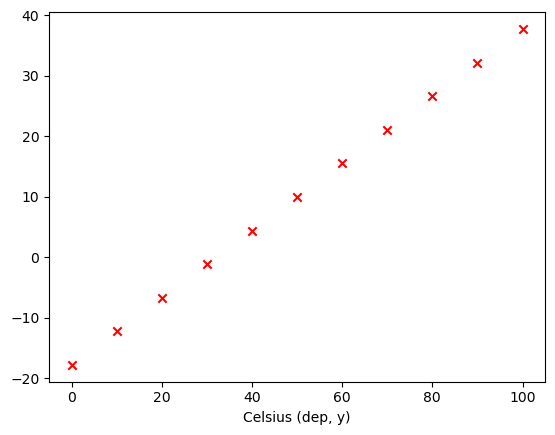

In [53]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
c = lambda f: 5*((f-32)/9)
temps = [(f, c(f)) for f in range(0, 101, 10)]
# print(temps)

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
# print(temps_df)
# print(c(130))

plt.scatter(temps_df['Fahrenheit'], temps_df['Celsius'], marker='x', color='red')
plt.xlabel('Fahrenheit (ind, x)')
plt.xlabel('Celsius (dep, y)')
plt.show()

______
## C(SSE): Sum of Squared Errors